<a href="https://colab.research.google.com/github/Elwing-Chou/ml0602/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

ship


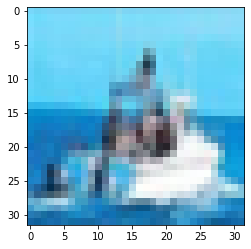

In [4]:
# mnist: (60000, ) [5, 2, 1, 0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [8]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100


In [ ]:
model.evaluate(x_test_norm, y_test)

In [ ]:
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])